# Example Usage of RCLVatlas

Lexi Jones

Last edited: 12/19/22

To run this example:
1. Download geostrophic velocity CMEMS data from 2019/09/30 - 2019/10/24
2. Setup the config.py file with the following params (default):
- grid_bounds = {
               'lon_bound_west':199.0,
               'lon_bound_east':204.0,
               'lat_bound_south':17.0,
               'lat_bound_north':22.0,
               'lag_grid_res':0.03125
               }

- sim_params = {
              'runtime':8, 
              'runtime_unit':'days',
              'timestep':20, 
              'output_freq':6,
              'backwards':'y'
              } 

- RCLV_params = {
               'min_dist':24,
               'min_area':104,
               'init_contour_step_frac':0.1,
               'convex_def_tol':0.001
               }

3. Run the following lines in the command line to simulate the Lagrangian trajectories and calculate the Lagrangian averaged vorticity deviation (LAVD)
- `python run_parcels_CMEMS.py 20191008`
- `python run_parcels_CMEMS.py 20191016`
- `python run_parcels_CMEMS.py 20191024`

At this point, you will have 3 8-day backward-in-time Lagrangian trajectories calculated for a 5x5 degree box near Hawaii. You will also have the LAVD calculated for each of these runs, which will be used to identify RCLVs. 

Stellas update-
1. activate parcels2 env
2. go into the RCLVatlas_stella path
3. 

In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from config import *

sys.path.append('./RCLVatlas')
from subfunctions_for_RCLV_atlas import read_RCLV_CSV_untracked,read_RCLV_CSV_tracked,save_RCLV_CSV
from mainfunctions_for_RCLV_atlas import *

Set up date list

In [2]:
dates = [filename[0:8] for filename in os.listdir(LAVD_dir)]
date_list = np.sort(np.unique(dates)).tolist()[::-1] #Reverse the order because we will iterate from the latest date to the earliest
date_list

['20100626', '20100618', '20100610']

Preview LAVD output

In [3]:
LAVD_output_file_path = LAVD_dir + date_list[0] + '_LAVD_' + filename_str + '.npy'
LAVD = np.load(LAVD_output_file_path)
LAVD = np.ma.masked_where(np.isnan(LAVD),LAVD) #Land mask required for the peak_local_max function to work
LAVD_reshape = np.transpose(np.reshape(LAVD,(len(traj_lon_array),len(traj_lat_array))))

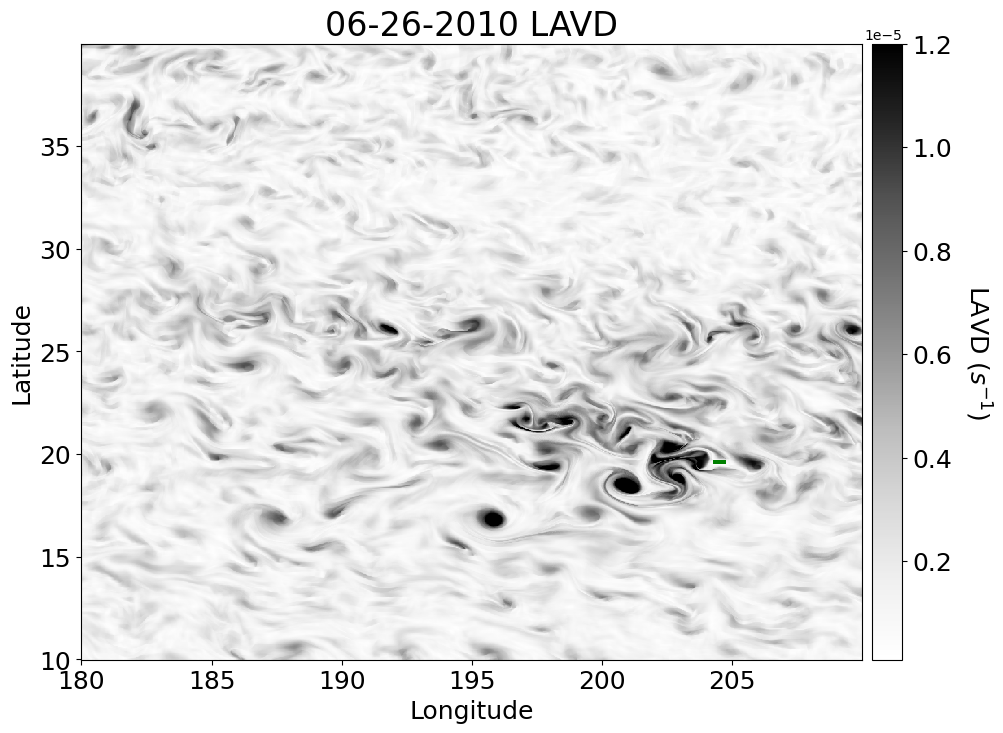

In [4]:
fontsize = 18

fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.set_facecolor("g")
plot = ax.pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));

cbar = plt.colorbar(plot, pad = 0.01)
cbar.ax.tick_params(labelsize=18)
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel('LAVD $(s^{-1})$', rotation=270, fontsize=fontsize)
    
ax.set_xlabel('Longitude',fontsize=fontsize)
ax.set_ylabel('Latitude',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_title('%s-%s-%s LAVD'%(date_list[0][4:6],date_list[0][6:8],date_list[0][0:4]),fontsize=24)

plt.show()

Identify RCLVs

IN SUBFUNCTIONS.PY I ADDED INLINES 56-59 THE -1 AFTER THE TIME INDEX BC OTHERWISE IT WAS NOT WORKING ~!!! KEEP THAT IN MIND `


In [5]:
RCLV_data = np.array(set_up_RCLV_atlas(date_list),dtype=object) 
print('Length of RCLV_data: %s'%(len(RCLV_data)))
save_RCLV_CSV(RCLV_data,'%sRCLV_%s_%s_untracked.csv'%(RCLV_dir,date_list[-1],date_list[0])) #save RCLV as CSV

Identifying RCLVs...
20100626
['/scratch/b/b382618/8day/lang_traj/20100626_8days_runtime_20min_timestep_particle_start_lat_10.0_40.0_lon_180.0_210.0_spatial_step_0.03125_6hr_output_freq.zarr']


/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


(105,)
(921600, 32)
0
0
(105,)
(921600, 32)
8
32
(105,)
(921600, 32)
1
4
(764,)
(921600, 32)
0
0
(764,)
(921600, 32)
8
32
(764,)
(921600, 32)
1
4
(1198,)
(921600, 32)
0
0
(1198,)
(921600, 32)
8
32
(1198,)
(921600, 32)
1
4
(108,)
(921600, 32)
0
0
(108,)
(921600, 32)
8
32
(108,)
(921600, 32)
1
4
(598,)
(921600, 32)
0
0
(598,)
(921600, 32)
8
32
(598,)
(921600, 32)
1
4
(185,)
(921600, 32)
0
0
(185,)
(921600, 32)
8
32
(185,)
(921600, 32)
1
4
(131,)
(921600, 32)
0
0
(131,)
(921600, 32)
8
32
(131,)
(921600, 32)
1
4
(157,)
(921600, 32)
0
0
(157,)
(921600, 32)
8
32
(157,)
(921600, 32)
1
4
(1064,)
(921600, 32)
0
0
(1064,)
(921600, 32)
8
32
(1064,)
(921600, 32)
1
4
(119,)
(921600, 32)
0
0
(119,)
(921600, 32)
8
32
(119,)
(921600, 32)
1
4
(95,)
(921600, 32)
0
0
(95,)
(921600, 32)
8
32
(95,)
(921600, 32)
1
4
(139,)
(921600, 32)
0
0
(139,)
(921600, 32)
8
32
(139,)
(921600, 32)
1
4
(124,)
(921600, 32)
0
0
(124,)
(921600, 32)
8
32
(124,)
(921600, 32)
1
4
(226,)
(921600, 32)
0
0
(226,)
(921600, 32)
8
32

/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


(251,)
(921600, 32)
0
0
(251,)
(921600, 32)
8
32
(251,)
(921600, 32)
1
4
(1121,)
(921600, 32)
0
0
(1121,)
(921600, 32)
8
32
(1121,)
(921600, 32)
1
4
(752,)
(921600, 32)
0
0
(752,)
(921600, 32)
8
32
(752,)
(921600, 32)
1
4
(752,)
(921600, 32)
0
0
(752,)
(921600, 32)
8
32
(752,)
(921600, 32)
1
4
(752,)
(921600, 32)
0
0
(752,)
(921600, 32)
8
32
(752,)
(921600, 32)
1
4
(109,)
(921600, 32)
0
0
(109,)
(921600, 32)
8
32
(109,)
(921600, 32)
1
4
(633,)
(921600, 32)
0
0
(633,)
(921600, 32)
8
32
(633,)
(921600, 32)
1
4
(96,)
(921600, 32)
0
0
(96,)
(921600, 32)
8
32
(96,)
(921600, 32)
1
4
(421,)
(921600, 32)
0
0
(421,)
(921600, 32)
8
32
(421,)
(921600, 32)
1
4
(126,)
(921600, 32)
0
0
(126,)
(921600, 32)
8
32
(126,)
(921600, 32)
1
4
(94,)
(921600, 32)
0
0
(94,)
(921600, 32)
8
32
(94,)
(921600, 32)
1
4
(538,)
(921600, 32)
0
0
(538,)
(921600, 32)
8
32
(538,)
(921600, 32)
1
4
(133,)
(921600, 32)
0
0
(133,)
(921600, 32)
8
32
(133,)
(921600, 32)
1
4
(131,)
(921600, 32)
0
0
(131,)
(921600, 32)
8
32
(131,

/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


(153,)
(921600, 32)
0
0
(153,)
(921600, 32)
8
32
(153,)
(921600, 32)
1
4
(579,)
(921600, 32)
0
0
(579,)
(921600, 32)
8
32
(579,)
(921600, 32)
1
4
(199,)
(921600, 32)
0
0
(199,)
(921600, 32)
8
32
(199,)
(921600, 32)
1
4
(142,)
(921600, 32)
0
0
(142,)
(921600, 32)
8
32
(142,)
(921600, 32)
1
4
(170,)
(921600, 32)
0
0
(170,)
(921600, 32)
8
32
(170,)
(921600, 32)
1
4
(114,)
(921600, 32)
0
0
(114,)
(921600, 32)
8
32
(114,)
(921600, 32)
1
4
(236,)
(921600, 32)
0
0
(236,)
(921600, 32)
8
32
(236,)
(921600, 32)
1
4
(119,)
(921600, 32)
0
0
(119,)
(921600, 32)
8
32
(119,)
(921600, 32)
1
4
(229,)
(921600, 32)
0
0
(229,)
(921600, 32)
8
32
(229,)
(921600, 32)
1
4
(277,)
(921600, 32)
0
0
(277,)
(921600, 32)
8
32
(277,)
(921600, 32)
1
4
(146,)
(921600, 32)
0
0
(146,)
(921600, 32)
8
32
(146,)
(921600, 32)
1
4
(242,)
(921600, 32)
0
0
(242,)
(921600, 32)
8
32
(242,)
(921600, 32)
1
4
(411,)
(921600, 32)
0
0
(411,)
(921600, 32)
8
32
(411,)
(921600, 32)
1
4
(177,)
(921600, 32)
0
0
(177,)
(921600, 32)
8
32
(1

In [6]:
print(RCLV_data) # header
# print(RCLV_data[1]) # example RCLV 

[list(['Date', 'RCLV ID', 'Orientation', 'Age (days)', 'Area (km^2)', 'Center Lon', 'Center Lat', 'CD', 'flag', 'Boundary Coords'])
 list(['20190312', nan, 'cyc', nan, np.float64(3586.6230826053543), np.float64(11.71875), np.float64(-51.125), np.float64(0.02430222942467824), 0, np.float64(12.09375), np.float64(-51.0), np.float64(12.125), np.float64(-51.0), np.float64(12.15625), np.float64(-51.0), np.float64(12.1875), np.float64(-51.0), np.float64(12.21875), np.float64(-51.0), np.float64(12.25), np.float64(-51.03125), np.float64(12.28125), np.float64(-51.03125), np.float64(12.3125), np.float64(-51.03125), np.float64(12.34375), np.float64(-51.03125), np.float64(12.375), np.float64(-51.03125), np.float64(12.375), np.float64(-51.03125), np.float64(12.40625), np.float64(-51.03125), np.float64(12.4375), np.float64(-51.0625), np.float64(12.46875), np.float64(-51.0625), np.float64(12.46875), np.float64(-51.0625), np.float64(12.5), np.float64(-51.0625), np.float64(12.53125), np.float64(-51.0937

In [6]:


# ax.set_xlabel('Longitude',fontsize=fontsize)
# ax.set_ylabel('Latitude',fontsize=fontsize)


# fontsize = 18

# fig,ax = plt.subplots(1,1,figsize=(12,8))
# ax.set_facecolor("g")
# plot = ax.pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));

# cbar = plt.colorbar(plot, pad = 0.01)
# cbar.ax.tick_params(labelsize=18)
# cbar.ax.get_yaxis().labelpad = 30
# cbar.ax.set_ylabel('LAVD $(s^{-1})$', rotation=270, fontsize=fontsize)

# # Plot the RCLVs for the given date
# RCLV_data_this_day = RCLV_data[np.where([r[0]==date for r in RCLV_data])[0]]
# RCLV_bnds = [r[9:] for r in RCLV_data_this_day] # boundary coordinates
# RCLV_orientations = [r[2] for r in RCLV_data_this_day] # eddy polarity
    
# ax.set_xlabel('Longitude',fontsize=fontsize)
# ax.set_ylabel('Latitude',fontsize=fontsize)
# ax.tick_params(axis='both', which='major', labelsize=fontsize)
# ax.set_title('%s-%s-%s LAVD'%(date_list[0][4:6],date_list[0][6:8],date_list[0][0:4]),fontsize=24)

# for i in np.arange(0,len(RCLV_bnds)):
#     x_bnds = [float(coord) for coord in RCLV_bnds[i][0::2]]
#     y_bnds = [float(coord) for coord in RCLV_bnds[i][1::2]]

#     if RCLV_orientations[i] == 'anti':
#         color = '#FF0000'
#     else:
#         color = '#4242FF'
#     ax.plot(x_bnds,y_bnds,linewidth=2,c=color)

# plt.show()
    




## This i have not done because you need to track for mulitple time steps

Track RCLVs through time

### So the RCLV dataset is a numpy array where each row is a list of all values. like all info is in one row list. THey are not connected by columns

In [25]:
# pd_dataset = pd.DataFrame({
#     'Date': RCLV_data[:, 0], 
#     'RCLV ID': RCLV_data[:, 1],
#     'Orientation': RCLV_data[:, 2], 
#     'Age (days)': RCLV_data[:, 3],
#     'Area (km^2)': RCLV_data[:, 4], 
#     'Center Lon': RCLV_data[:, 5],
#     'Center Lat': RCLV_data[:, 6], 
#     'CD': RCLV_data[:, 7],
#     'flag': RCLV_data[:, 8], 
#     'Boundary Coords': RCLV_data[:, 9],


# })


### it looks like the error i get close to 0 is to do with deleting particles, recovery and stuff like that

Is the issue for this not running bc the last ts does not have any eddies?? -YES !!!!!!!!!

## IF THERE ARE NO EDDIES IT WILL NOT MOVE FURTHER !!

In [6]:
RCLV_data = np.array(read_RCLV_CSV_untracked('%sRCLV_%s_%s_untracked.csv'%(RCLV_dir,date_list[-1],date_list[0]),1),dtype=object)
RCLV_data = track_and_ID_RCLVs(RCLV_data,date_list)
save_RCLV_CSV(RCLV_data,'%sRCLV_%s_%s_tracked_with_ID.csv'%(RCLV_dir,date_list[-1],date_list[0])) # Save the tracked data as a CSV

Tracking eddies through time & IDing...
Number of identical contours to remove: 0
20100626


/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warni

20100618
20100610


/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/b/b382618/.conda/envs/parcels2/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


QC skip step

In [7]:
log_file = open('%sRCLV_%s_%s_log_file.txt'%(RCLV_dir,date_list[-1],date_list[0]),'a')
RCLV_data = read_RCLV_CSV_tracked('%sRCLV_%s_%s_tracked_with_ID.csv'%(RCLV_dir,date_list[-1],date_list[0]))    
# RCLV_data = interpolate_skipped_contours(RCLV_data,log_file,date_list)
# save_RCLV_CSV(RCLV_data,'%sRCLV_%s_%s_skips_interpolated.csv'%(RCLV_dir,date_list[-1],date_list[0]))

## currently I am not doing the interpolation that the packege offers bc something is not working !!

Age the contours

In [8]:
# RCLV_data = read_RCLV_CSV_tracked('%sRCLV_%s_%s_skips_interpolated.csv'%(RCLV_dir,date_list[-1],date_list[0]))
RCLV_data = read_RCLV_CSV_tracked('%sRCLV_%s_%s_tracked_with_ID.csv'%(RCLV_dir,date_list[-1],date_list[0]))

RCLV_data = age_RCLVs(RCLV_data)
save_RCLV_CSV(RCLV_data,'%sRCLV_%s_%s_atlas.csv'%(RCLV_dir,date_list[-1],date_list[0])) # Save the final dataset
RCLV_data = np.array(RCLV_data,dtype=object)

Giving RCLVs an age & saving the final atlas...


Overlay the RCLVs on the LAVD fields

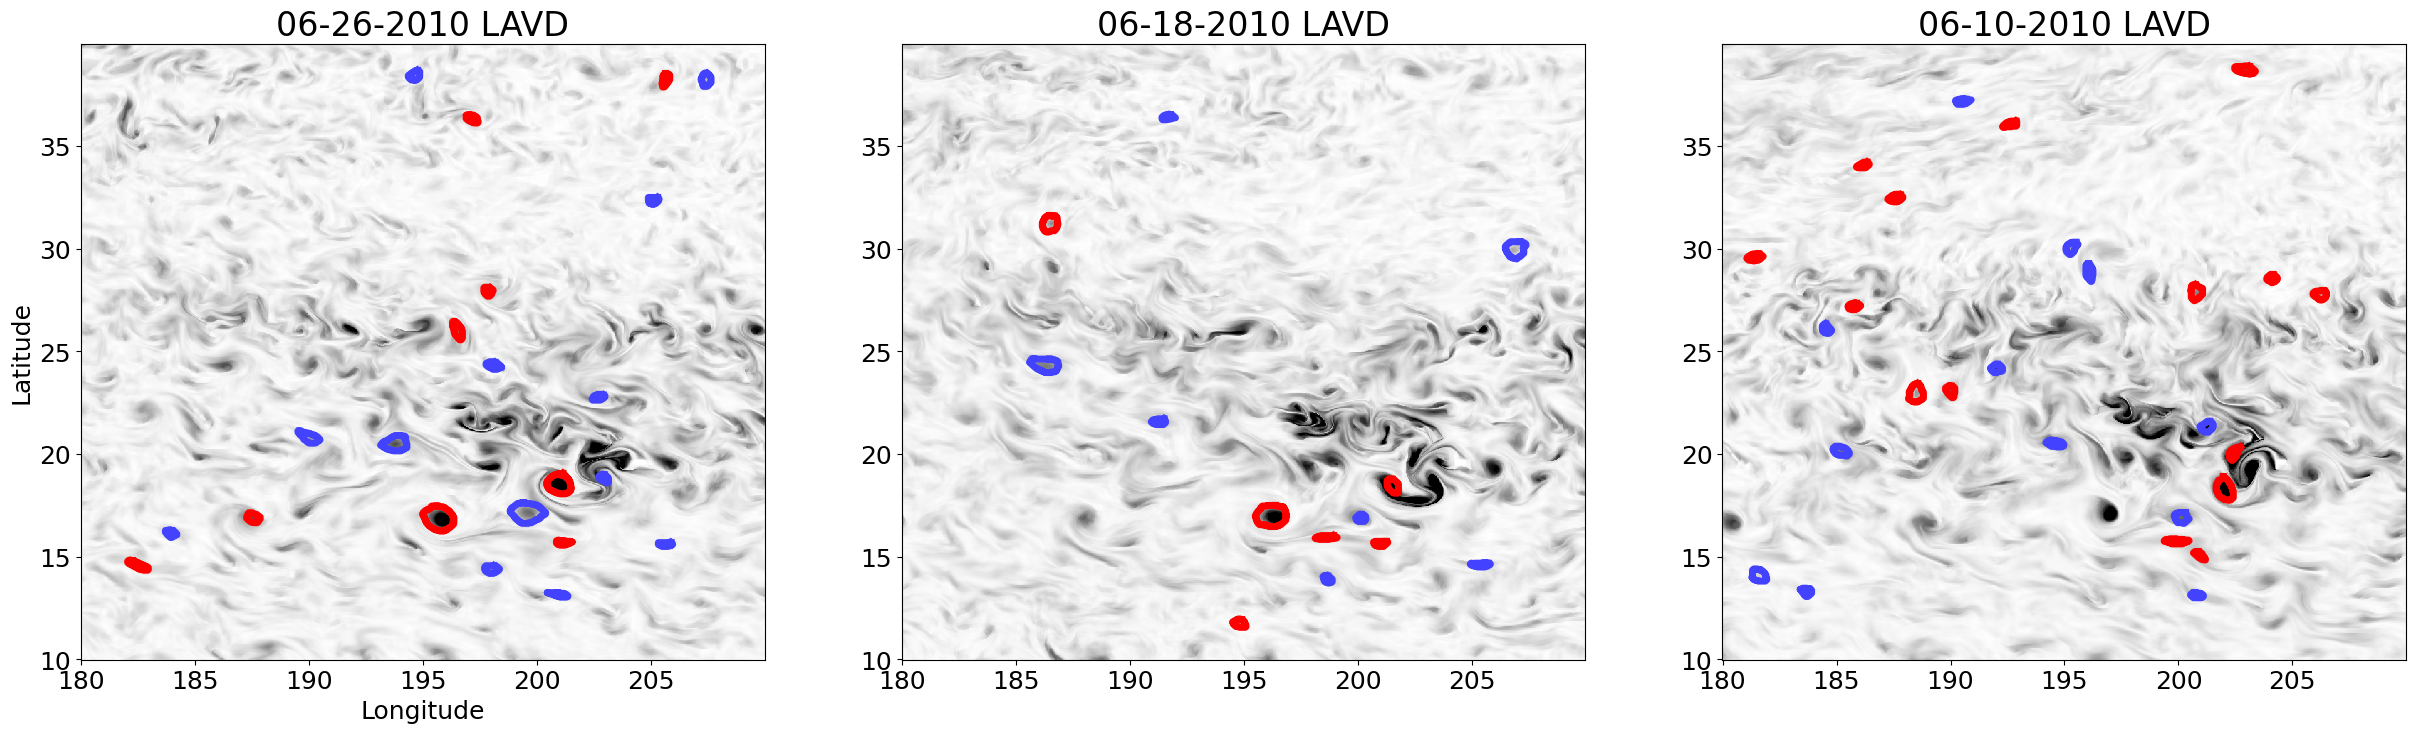

In [9]:
fontsize = 18
fig,ax = plt.subplots(1,3,figsize=(30,8))

ax[0].set_xlabel('Longitude',fontsize=fontsize)
ax[0].set_ylabel('Latitude',fontsize=fontsize)

c = 0
for date in date_list:
    # Load the LAVD data
    LAVD_output_file_path = LAVD_dir + date + '_LAVD_' + filename_str + '.npy'
    LAVD = np.load(LAVD_output_file_path)
    LAVD = np.ma.masked_where(np.isnan(LAVD),LAVD) #Land mask required for the peak_local_max function to work
    LAVD_reshape = np.transpose(np.reshape(LAVD,(len(traj_lon_array),len(traj_lat_array))))
    
    # Plot the LAVD 
    plot = ax[c].pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));
    ax[c].tick_params(axis='both', which='major', labelsize=fontsize)
    ax[c].set_title('%s-%s-%s LAVD'%(date[4:6],date[6:8],date[0:4]),fontsize=24)

    # Plot the RCLVs for the given date
    RCLV_data_this_day = RCLV_data[np.where([r[0]==date for r in RCLV_data])[0]]
    RCLV_bnds = [r[9:] for r in RCLV_data_this_day] # boundary coordinates
    RCLV_orientations = [r[2] for r in RCLV_data_this_day] # eddy polarity
    
    for i in np.arange(0,len(RCLV_bnds)):
        x_bnds = [float(coord) for coord in RCLV_bnds[i][0::2]]
        y_bnds = [float(coord) for coord in RCLV_bnds[i][1::2]]

        if RCLV_orientations[i] == 'anti':
            color = '#FF0000'
        else:
            color = '#4242FF'
        ax[c].plot(x_bnds,y_bnds,linewidth=5,c=color)
    c += 1

plt.show()

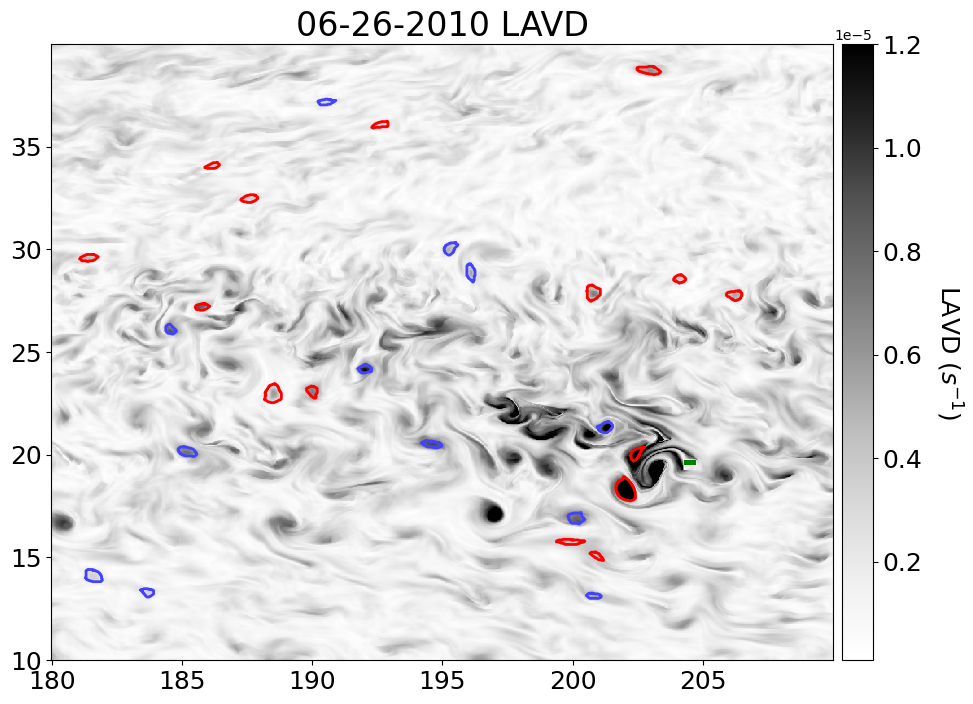

In [10]:


# ax.set_xlabel('Longitude',fontsize=fontsize)
# ax.set_ylabel('Latitude',fontsize=fontsize)


fontsize = 18

fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.set_facecolor("g")
plot = ax.pcolormesh(traj_lon_array,traj_lat_array,LAVD_reshape,shading='nearest',cmap='Greys',vmin=10**(-7), vmax=1.2*(10**(-5)));

cbar = plt.colorbar(plot, pad = 0.01)
cbar.ax.tick_params(labelsize=18)
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel('LAVD $(s^{-1})$', rotation=270, fontsize=fontsize)
    
# ax.set_xlabel('Longitude',fontsize=fontsize)
# ax.set_ylabel('Latitude',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_title('%s-%s-%s LAVD'%(date_list[0][4:6],date_list[0][6:8],date_list[0][0:4]),fontsize=24)

for i in np.arange(0,len(RCLV_bnds)):
    x_bnds = [float(coord) for coord in RCLV_bnds[i][0::2]]
    y_bnds = [float(coord) for coord in RCLV_bnds[i][1::2]]

    if RCLV_orientations[i] == 'anti':
        color = '#FF0000'
    else:
        color = '#4242FF'
    ax.plot(x_bnds,y_bnds,linewidth=2,c=color)

plt.show()
    




Color by RCLV age

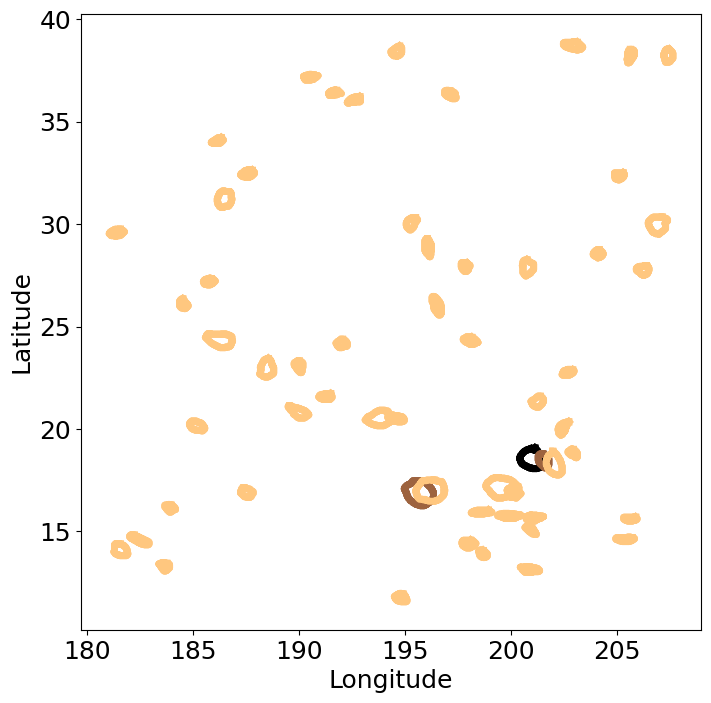

In [11]:
RCLV_bnds = [r[9:] for r in RCLV_data[1:]] # boundary coordinates
RCLV_ages = [r[3] for r in RCLV_data[1:]] # ages
norm = colors.Normalize(vmin=min(RCLV_ages), vmax=max(RCLV_ages))

fontsize = 18
fig,ax = plt.subplots(1,1,figsize=(8,8))

for date in date_list:
    for i in np.arange(0,len(RCLV_bnds)):
        x_bnds = [float(coord) for coord in RCLV_bnds[i][0::2]]
        y_bnds = [float(coord) for coord in RCLV_bnds[i][1::2]]
        ax.plot(x_bnds,y_bnds,linewidth=5,c=plt.cm.copper_r(norm(RCLV_ages[i])))
            
ax.set_xlabel('Longitude',fontsize=fontsize)
ax.set_ylabel('Latitude',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)

plt.show()